# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [52]:
from sklearn import datasets
import pandas as pd
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [53]:
iris_data=pd.DataFrame(X)
iris_target=pd.DataFrame(y)
iris=pd.concat([iris_data,iris_target],axis=1,ignore_index=True)
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


For n_cluseter:2 The average silhouette_score is :0.681046169211746
For n_cluseter:3 The average silhouette_score is :0.5528190123564091
For n_cluseter:4 The average silhouette_score is :0.4980505049972867
For n_cluseter:5 The average silhouette_score is :0.4887488870931048
For n_cluseter:6 The average silhouette_score is :0.3678464984712235
For n_cluseter:7 The average silhouette_score is :0.3588294450965675
For n_cluseter:8 The average silhouette_score is :0.34901133143367136


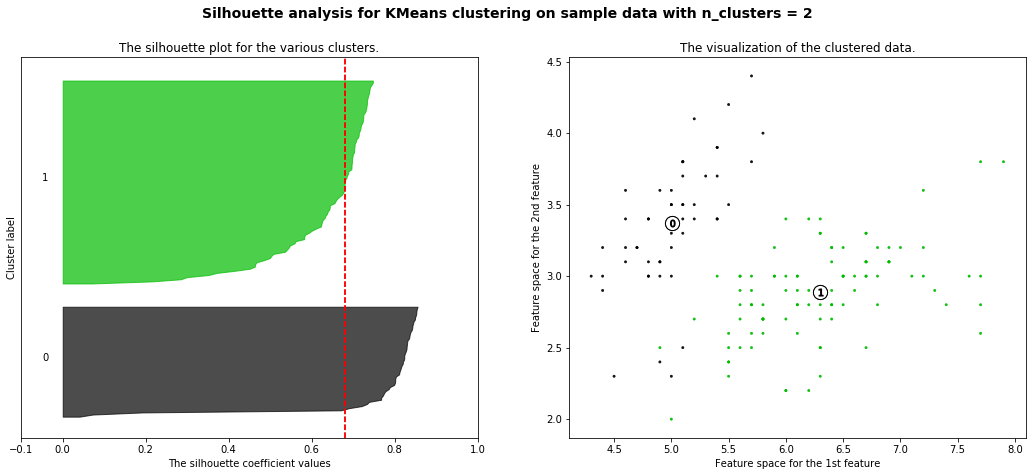

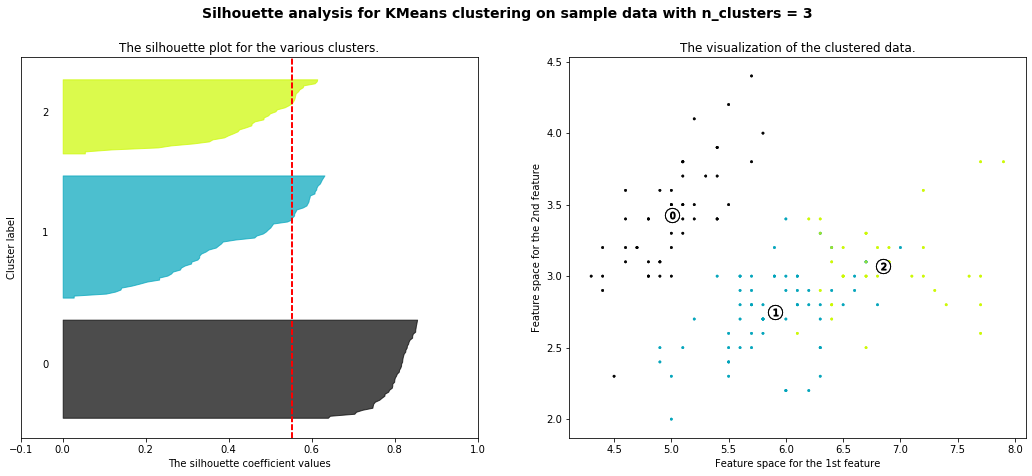

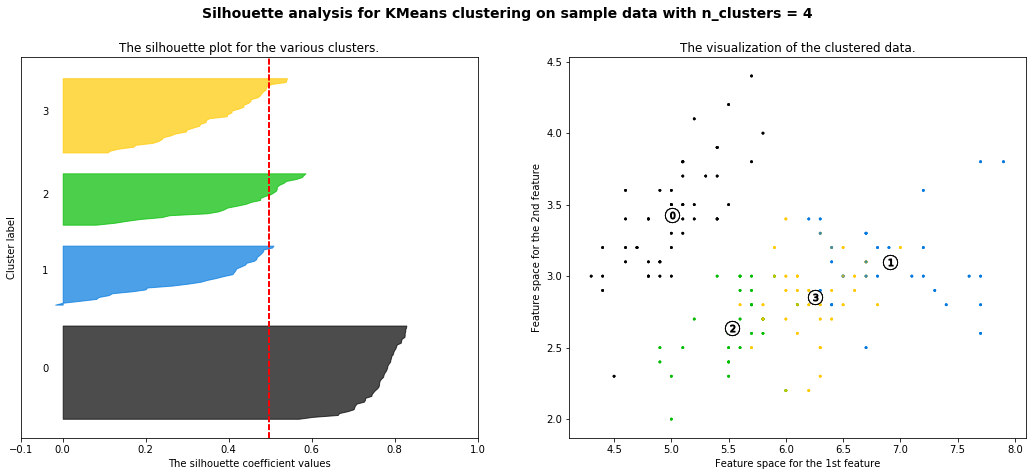

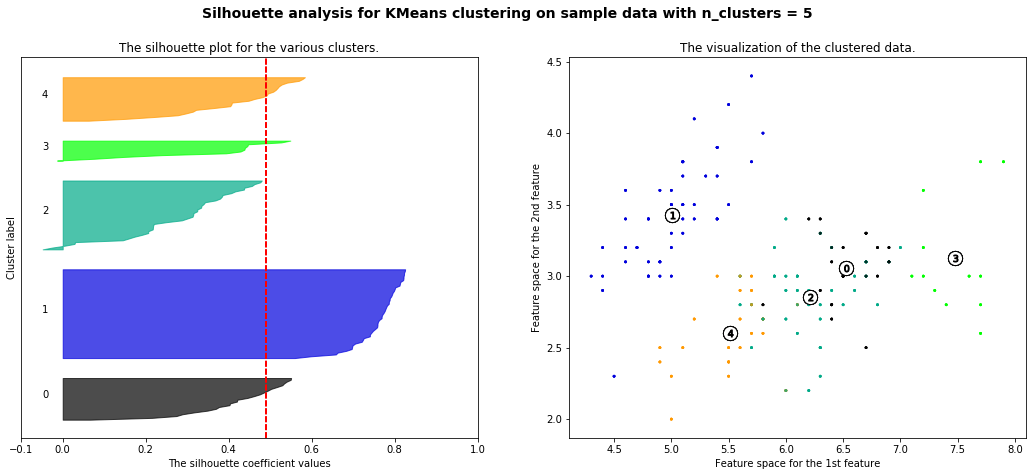

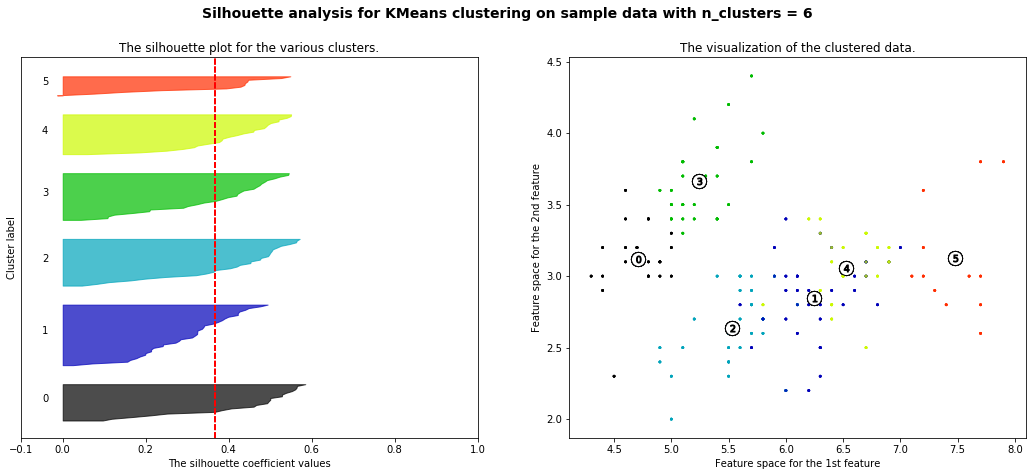

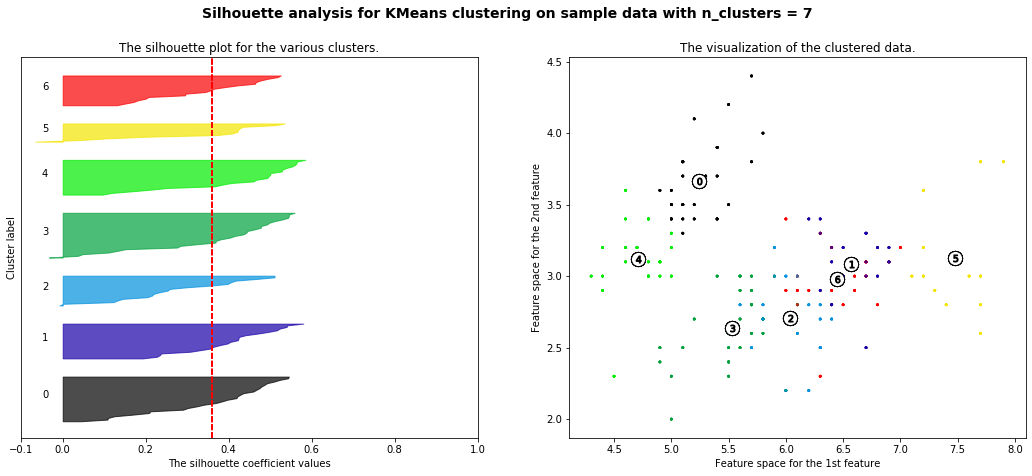

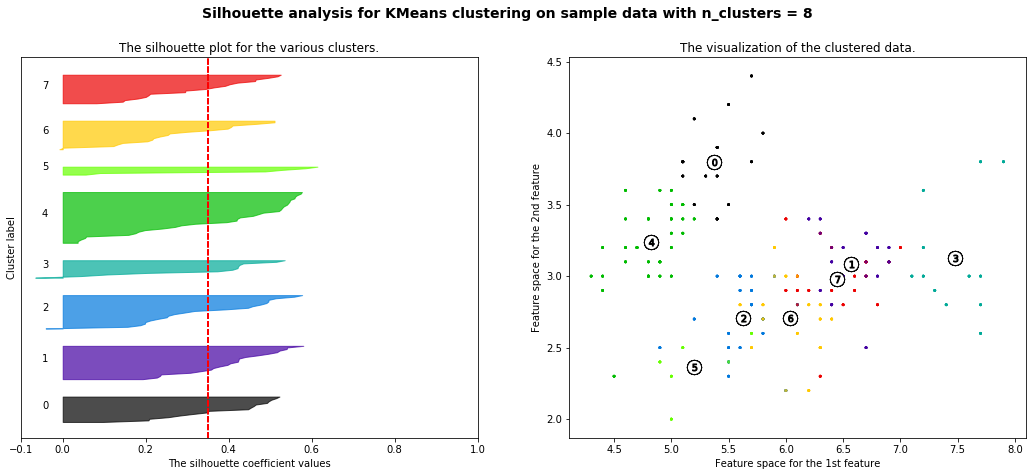

In [54]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

n_range_clusters=[2,3,4,5,6,7,8]

for n_cluster in n_range_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
   
    
    ax1.set_xlim([-0.1,1])
    # (n_clusters+1)*10 這部分是用來在不同輪廓圖間塞入空白, 讓圖形看起來更清楚
    ax1.set_ylim([0, len(X) + (n_cluster + 1) * 10])

    cluster=KMeans(n_clusters=n_cluster,random_state=10)
    cluster.fit(iris_data)
    cluster_labels=cluster.fit_predict(iris_data)
    
    silhouette_avg=silhouette_score(iris_data,cluster_labels)
    print(f'For n_cluseter:{n_cluster} The average silhouette_score is :{silhouette_avg}')
    
    # 計算所有樣本的 The silhouette_score
    sample_silhouette_values=silhouette_samples(iris_data,cluster_labels)
    
    y_lower=10
    for i in range(n_cluster):
        # 收集集群 i 樣本的輪廓分數，並對它們進行排序
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_cluster)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)
        
        # 在每個集群中間標上 i 的數值
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
         # 計算下一個 y_lower 的位置
        y_lower = y_upper + 10
        
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        
        # 將 silhouette_score 平均所在位置, 畫上一條垂直線
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        
        ax1.set_yticks([])  # 清空 y 軸的格線
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 右圖我們用來畫上每個樣本點的分群狀態, 從另一個角度觀察分群是否洽當
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_cluster)
        
        ax2.scatter(iris_data.iloc[:, 0], iris_data.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')
        
        # 在右圖每一群的中心處, 畫上一個圓圈並標註對應的編號
        centers = cluster.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')
        
        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % (i), alpha=1,s=50, edgecolor='k')

            ax2.set_title("The visualization of the clustered data.")
            ax2.set_xlabel("Feature space for the 1st feature")
            ax2.set_ylabel("Feature space for the 2nd feature")

            plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                          "with n_clusters = %d" % n_cluster),
                        fontsize=14, fontweight='bold')  
plt.show()    
        